In [1]:
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()

In [3]:
def make_hello(N=1000, rseed=42):
  fig,ax = plt.subplots(figsize=(4,1))
  plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
  ax.axis('off')
  ax.text(0.5, 0.4, 'HELLO',
          va='center', ha='center', weight='bold', size=85)
  fig.savefig('hello.png')
  plt.close(fig)

  from matplotlib.image import imread
  data  = imread('hello.png')[::-1, :, 0].T
  rng   = np.random.RandomState(rseed)
  X     = rng.rand(4*N,2)
  i,j   = (X*data.shape).astype(int).T
  mask  = data[i,j]<1
  X     = X[mask]
  X[:,0] *= data.shape[0]/data.shape[1]
  X     = X[:N]

  return X[np.argsort(X[:,0])]

X = make_hello()

(-0.19972965643412033,
 4.195346643588747,
 0.02244321091604335,
 0.990457146590137)

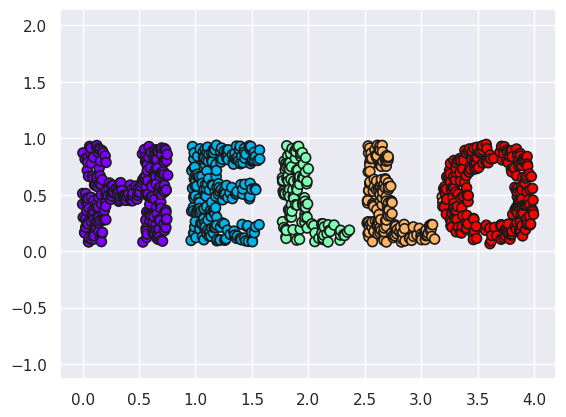

In [4]:
colorize=dict(c=X[:,0], s=50, ec='k', lw=1.2,
              cmap=mpl.colormaps['rainbow'].resampled(5))
plt.scatter(X[:,0], X[:,1], **colorize)
plt.axis('equal')

In [5]:
def rotate(X, degree=20):
  rad = np.deg2rad(degree)
  R   = np.array([
      [ np.cos(rad), np.sin(rad)],
      [-np.sin(rad), np.cos(rad)]
  ])

  return np.dot(X,R)

(4.507487053249943, 8.845503039218586, 4.991879306174322, 7.269254509788998)

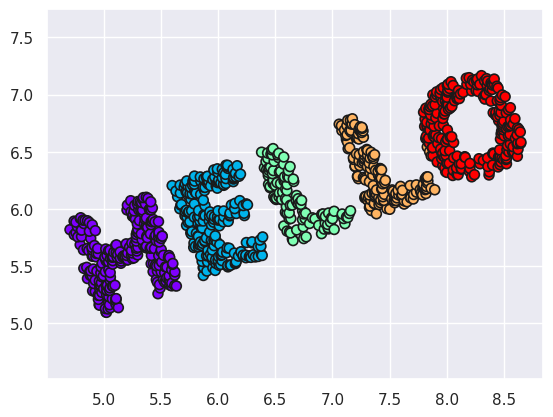

In [6]:
X2 = rotate(X, 20) + 5
plt.scatter(X2[:,0], X2[:,1], **colorize)
plt.axis('equal')

In [7]:
from sklearn.metrics import pairwise_distances
D = pairwise_distances(X)
D.shape

(1000, 1000)

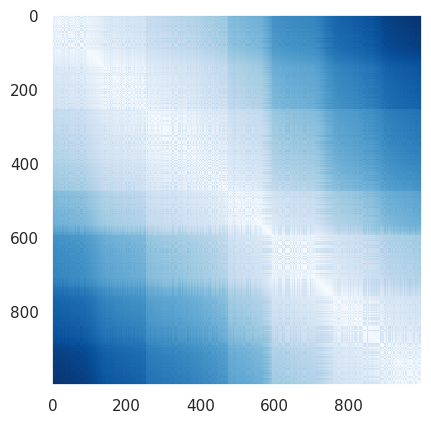

In [8]:
plt.imshow(D, cmap='Blues', interpolation='nearest', zorder=1)

In [9]:
D2 = pairwise_distances(X2)
np.allclose(D,D2)

True

In [10]:
from sklearn.manifold import MDS
model = MDS(n_components=2, dissimilarity='precomputed', random_state=1)
proj = model.fit_transform(D)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


(-2.0314683289212114,
 2.139050090753283,
 -1.3432561900442945,
 1.3682556159800603)

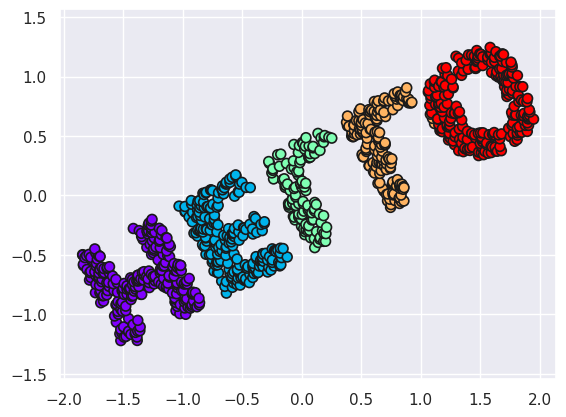

In [11]:
plt.scatter(proj[:,0], proj[:,1], **colorize)
plt.axis('equal')

In [12]:
def random_projection(X, dim=3, rseed=42):
  assert dim >= X.shape[1]
  rng = np.random.RandomState(rseed)
  C   = rng.rand(dim, dim)
  e,V = np.linalg.eigh(np.dot(C, C.T))

  return np.dot(X, V[:X.shape[1]])

In [13]:
X3 = random_projection(X)

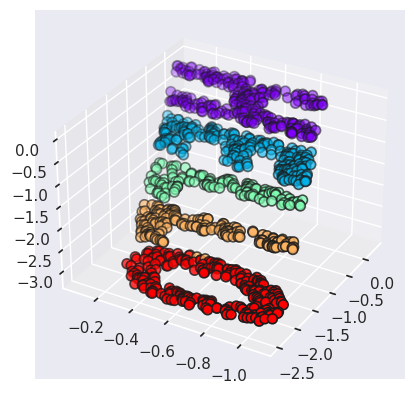

In [14]:
ax = plt.subplot(projection='3d')
ax.scatter3D(X3[:,0], X3[:,1], X3[:,2], **colorize)
ax.view_init(azim=210, elev=30)

In [15]:
from sklearn.manifold import MDS
model = MDS(n_components=2, random_state=1)
proj  = model.fit_transform(X3)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


(-2.031468328921213,
 2.1390500907532832,
 -1.343256190044287,
 1.3682556159800556)

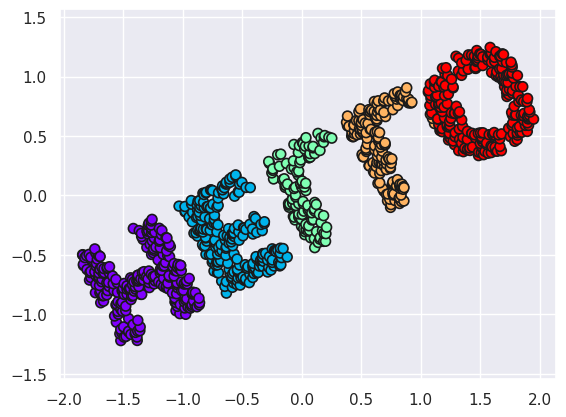

In [16]:
plt.scatter(proj[:,0], proj[:,1], **colorize)
plt.axis('equal')

In [17]:
def make_hello_s_curve(X):
  t = (X[:,0] - 2)*0.75*np.pi
  x = np.sin(t)
  y = X[:,1]
  z = np.sign(t)*(1 - np.cos(t))

  return np.vstack([x,y,z]).T

In [18]:
Xs = make_hello_s_curve(X)

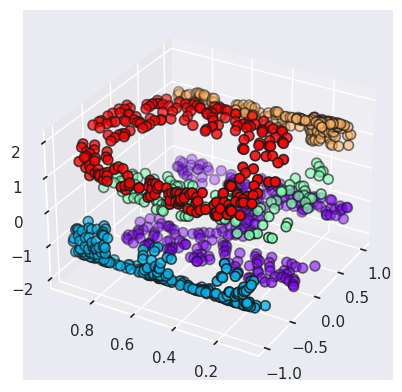

In [19]:
ax = plt.subplot(projection='3d')
ax.scatter(Xs[:,0], Xs[:,1], Xs[:,2], **colorize)
ax.view_init(azim=210, elev=30)

In [20]:
from sklearn.manifold import MDS
model = MDS(n_components=2, random_state=2)
proj  = model.fit_transform(Xs)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


(-1.7542649693704555,
 1.7171533174441027,
 -2.253133416776031,
 2.0016781872998273)

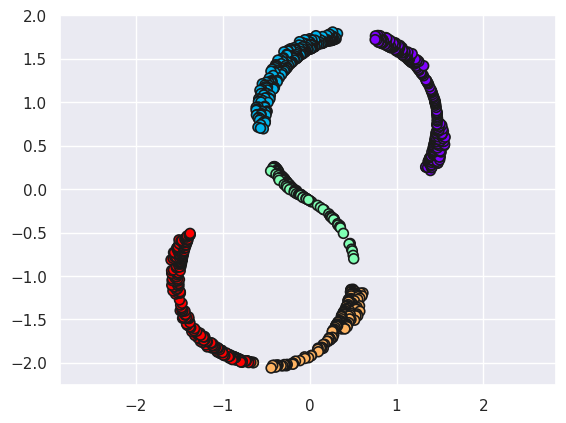

In [21]:
plt.scatter(proj[:,0], proj[:,1], **colorize)
plt.axis('equal')

In [22]:
from sklearn.manifold import LocallyLinearEmbedding

model = LocallyLinearEmbedding(n_neighbors=100, n_components=2,
                               method='modified', eigen_solver='dense')
proj  = model.fit_transform(Xs)

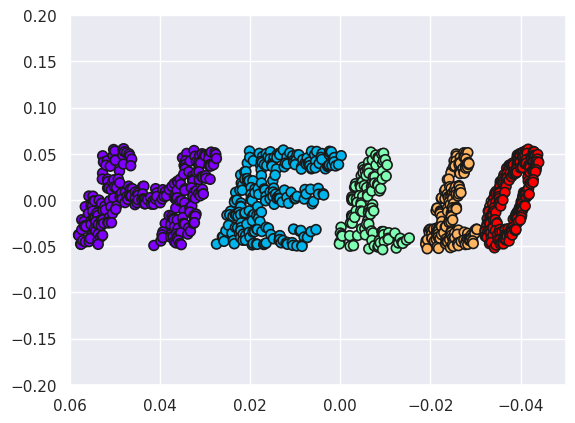

In [23]:
plt.scatter(proj[:,0], proj[:,1], **colorize)
# plt.axis('equal')
plt.axis([-0.05, +0.06, -0.2, +0.2])
plt.gca().invert_xaxis()